In [122]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# importing data
df = pd.read_csv("/kaggle/input/loan-data-set/loan_train.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [125]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


<AxesSubplot:>

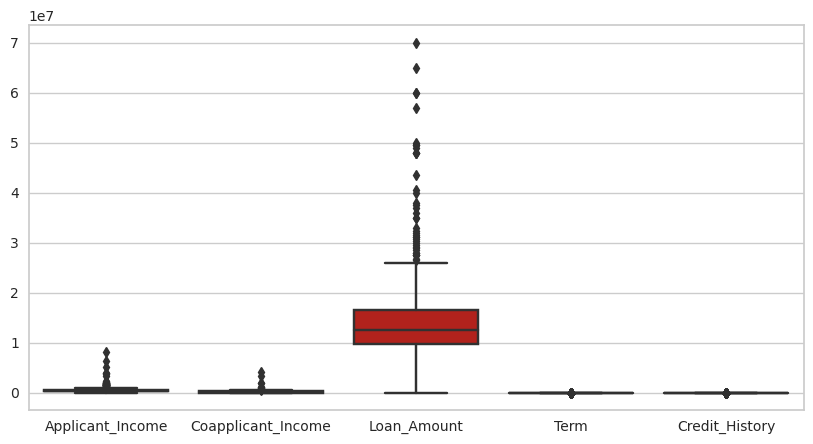

In [126]:
# boxplot to check outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

<AxesSubplot:xlabel='Loan_Amount', ylabel='Count'>

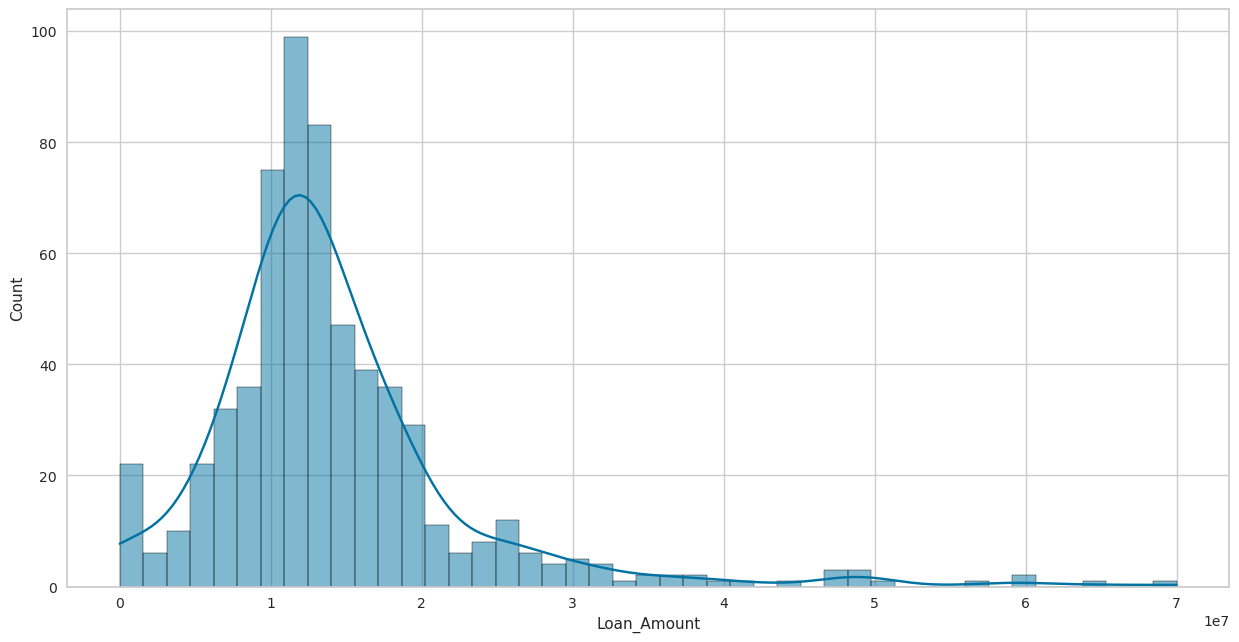

In [127]:
# histogram with kde to check column behaviour
plt.figure(figsize=(15,7.5))
sns.histplot(x='Loan_Amount',data=df,kde=True)

<AxesSubplot:xlabel='Applicant_Income', ylabel='Count'>

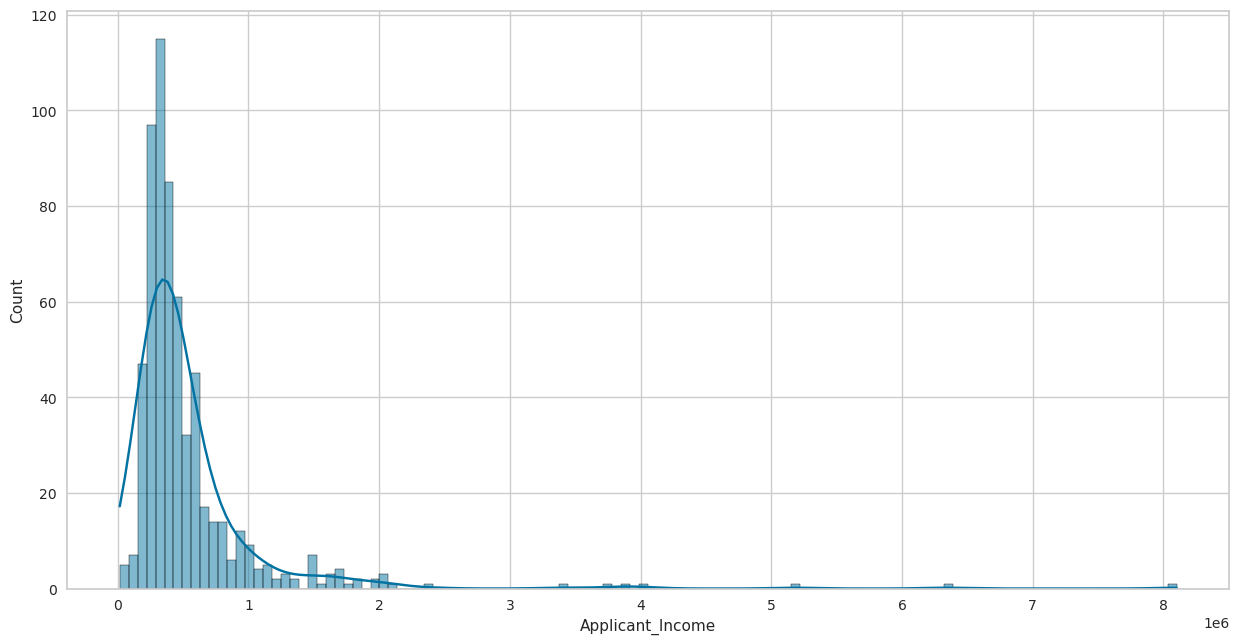

In [128]:
plt.figure(figsize=(15,7.5))
sns.histplot(x='Applicant_Income',data=df,kde=True)

<AxesSubplot:xlabel='Loan_Amount', ylabel='Applicant_Income'>

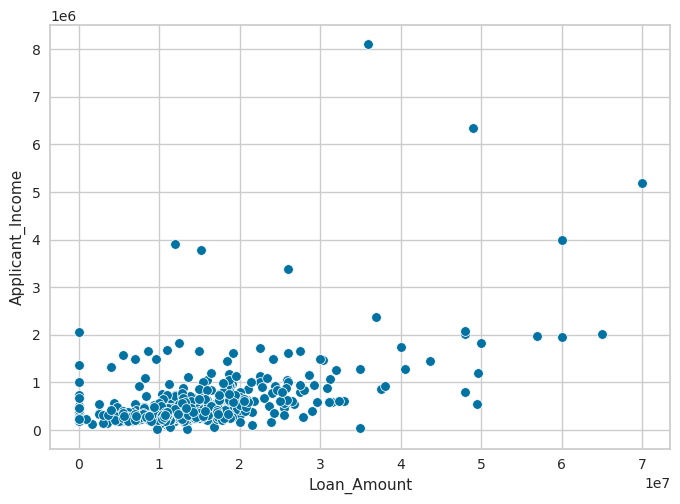

In [129]:
# check relation between two most important features
sns.scatterplot(x='Loan_Amount',y='Applicant_Income',data=df)

In [130]:
# Replacing outliers
# Calculate IQR
Q1 = df['Loan_Amount'].quantile(0.25)
Q3 = df['Loan_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Loan_Amount'] < lower_bound) | (df['Loan_Amount'] > upper_bound)]

# Replace outliers with column mean
column_mean = df['Loan_Amount'].mean()
df.loc[outliers.index, 'Loan_Amount'] = column_mean


In [131]:
# Calculate IQR
Q1 = df['Applicant_Income'].quantile(0.25)
Q3 = df['Applicant_Income'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Applicant_Income'] < lower_bound) | (df['Applicant_Income'] > upper_bound)]

# Replace outliers with column mean
column_mean = df['Applicant_Income'].mean()
df.loc[outliers.index, 'Applicant_Income'] = column_mean


<AxesSubplot:xlabel='Loan_Amount', ylabel='Count'>

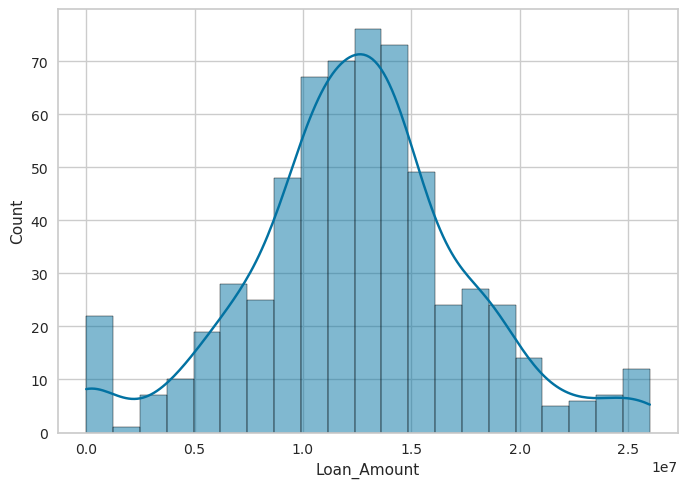

In [132]:
sns.histplot(data=df,x='Loan_Amount',kde=True)

<AxesSubplot:xlabel='Applicant_Income', ylabel='Count'>

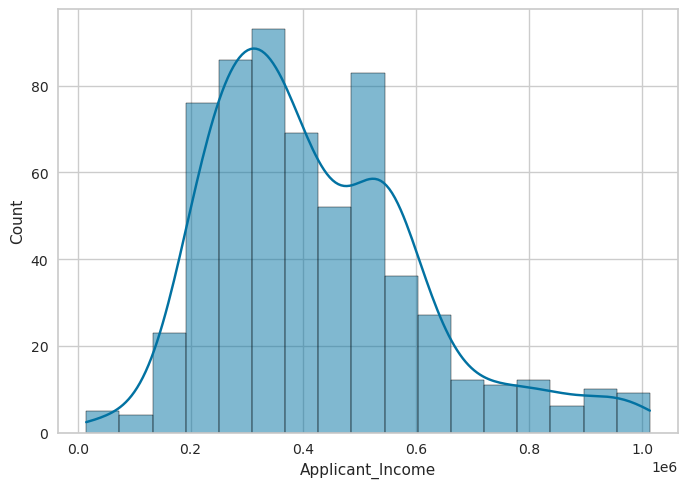

In [133]:
sns.histplot(data=df,x='Applicant_Income',kde=True)

<AxesSubplot:>

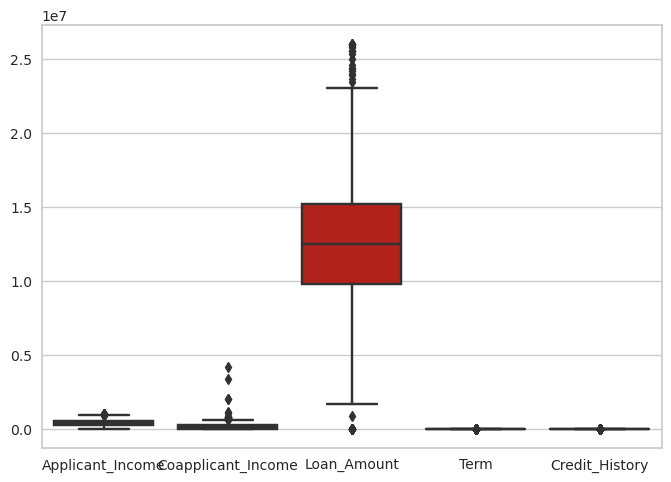

In [134]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='Loan_Amount', ylabel='Applicant_Income'>

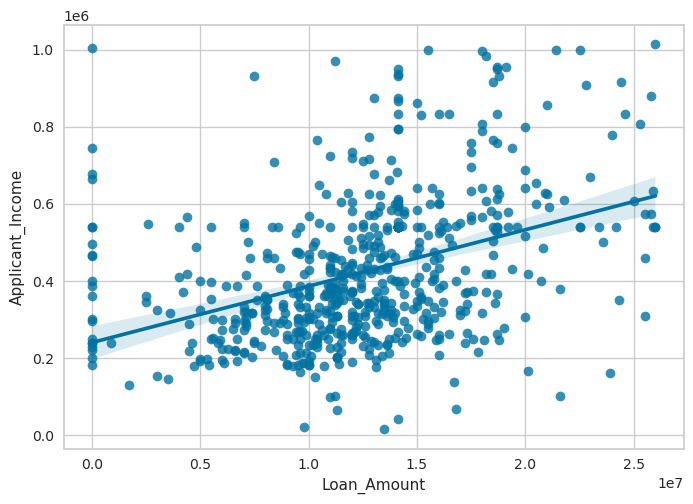

In [135]:
import seaborn as sns
sns.regplot(x='Loan_Amount', y='Applicant_Income', data=df)

In [136]:
df.dropna(inplace=True,how='any')

In [137]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [138]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900.0,0.0,15000000.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300.0,150800.0,12800000.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000.0,0.0,6600000.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300.0,235800.0,12000000.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000.0,0.0,14100000.0,360.0,1.0,Urban,Y


In [139]:
# labelencoder function
from sklearn.preprocessing import LabelEncoder

def label_encode_column(df, column_name):
    """
    Label encodes a column in a pandas dataframe.
    
    Parameters:
        df (pandas.DataFrame): the dataframe containing the column to be encoded
        column_name (str): the name of the column to be encoded
        
    Returns:
        pandas.DataFrame: the original dataframe with the encoded column
    """
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(df[column_name])
    df[column_name] = encoded_column
    return df

In [140]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder

def onehot_encode_column(df, column_name):
    """
    One-hot encodes a column in a pandas dataframe.
    
    Parameters:
        df (pandas.DataFrame): the dataframe containing the column to be encoded
        column_name (str): the name of the column to be encoded
        
    Returns:
        pandas.DataFrame: the original dataframe with the encoded column(s)
    """
    # Create the OneHotEncoder object
    encoder = OneHotEncoder(sparse=False, drop='first')
    
    # Reshape the column to a 2D array for the encoder
    column_array = df[column_name].values.reshape(-1, 1)
    
    # Fit and transform the encoder on the column
    encoded_columns = encoder.fit_transform(column_array)
    
    # Get the names of the encoded columns
    unique_values = df[column_name].unique()
    new_column_names = [f"{column_name}_{value}" for value in unique_values[1:]]
    
    # Create a new dataframe with the encoded columns
    encoded_df = pd.DataFrame(encoded_columns, columns=new_column_names, index=df.index)
    
    # Merge the original dataframe with the encoded dataframe
    df = pd.concat([df, encoded_df], axis=1)
    
    # Drop the original column from the dataframe
    df.drop(column_name, axis=1, inplace=True)
    
    # Return the encoded dataframe
    return df


In [141]:
# Using function to encoding of data 
label_encode_column(df,'Gender')
label_encode_column(df,'Married')
label_encode_column(df,'Self_Employed')
label_encode_column(df,'Education')
label_encode_column(df,'Status')
label_encode_column(df,'Area')

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900.0,0.0,15000000.0,360.0,1.0,2,1
1,1,1,1,0,0,458300.0,150800.0,12800000.0,360.0,1.0,0,0
2,1,1,0,0,1,300000.0,0.0,6600000.0,360.0,1.0,2,1
3,1,1,0,1,0,258300.0,235800.0,12000000.0,360.0,1.0,2,1
4,1,0,0,0,0,600000.0,0.0,14100000.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000.0,0.0,7100000.0,360.0,1.0,0,1
610,1,1,3+,0,0,410600.0,0.0,4000000.0,180.0,1.0,0,1
611,1,1,1,0,0,807200.0,24000.0,25300000.0,360.0,1.0,2,1
612,1,1,2,0,0,758300.0,0.0,18700000.0,360.0,1.0,2,1


In [142]:
df['Dependents'] = df['Dependents'].str.replace('+', '')

In [143]:
# Chnging datatypes of columns
df[['Coapplicant_Income','Loan_Amount','Term','Credit_History','Dependents']] = df[['Coapplicant_Income','Loan_Amount','Term','Credit_History','Dependents']].astype(int)

In [144]:
df.dtypes

Gender                  int64
Married                 int64
Dependents              int64
Education               int64
Self_Employed           int64
Applicant_Income      float64
Coapplicant_Income      int64
Loan_Amount             int64
Term                    int64
Credit_History          int64
Area                    int64
Status                  int64
dtype: object

<AxesSubplot:>

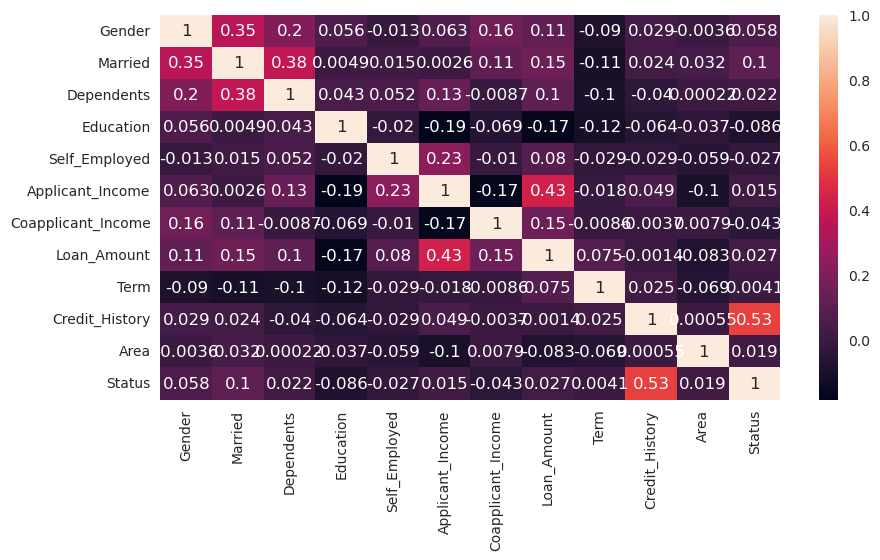

In [145]:
# Checking pearson correlation
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot:>

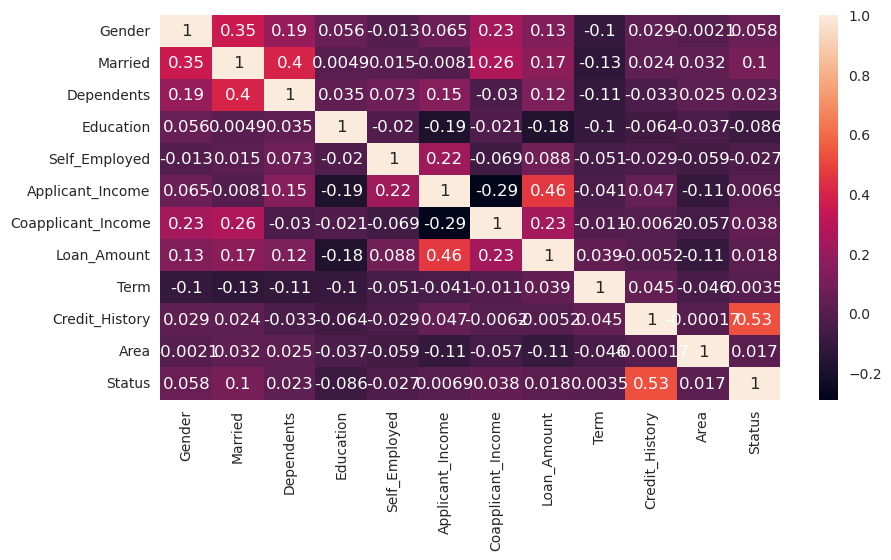

In [146]:
# checking spearman correlation
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(method='spearman'),annot=True)

In [147]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900.0,0,15000000,360,1,2,1
1,1,1,1,0,0,458300.0,150800,12800000,360,1,0,0
2,1,1,0,0,1,300000.0,0,6600000,360,1,2,1
3,1,1,0,1,0,258300.0,235800,12000000,360,1,2,1
4,1,0,0,0,0,600000.0,0,14100000,360,1,2,1


In [148]:
from pandas_profiling import ProfileReport
data_profile = ProfileReport(df, title='Loan Profiling Report')

In [149]:
data_profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [150]:
!pip install pycaret

In [151]:
from pycaret.classification import *

In [152]:
data_setup = setup(df, target='Status',  train_size = 0.6, session_id=123)

,Description,Value
0,Session id,123
1,Target,Status
2,Target type,Binary
3,Original data shape,"(499, 12)"
4,Transformed data shape,"(499, 12)"
5,Transformed train set shape,"(299, 12)"
6,Transformed test set shape,"(200, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [153]:
knn = create_model('knn',n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4333,0.3925,0.6500,0.5652,0.6047,-0.3784,-0.3901
1,0.6000,0.5600,0.9000,0.6429,0.7500,-0.1250,-0.1890
2,0.7000,0.6250,0.8500,0.7391,0.7907,0.2703,0.2786
3,0.7000,0.6900,0.9000,0.7200,0.8000,0.2286,0.2530
4,0.5333,0.5600,0.7500,0.6250,0.6818,-0.1667,-0.1768
5,0.6333,0.4365,0.7619,0.7273,0.7442,0.0984,0.0987
6,0.6667,0.4656,0.9048,0.7037,0.7917,0.0196,0.0242
7,0.5333,0.4630,0.6667,0.6667,0.6667,-0.1111,-0.1111
8,0.7000,0.6481,0.9048,0.7308,0.8085,0.1509,0.1712


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

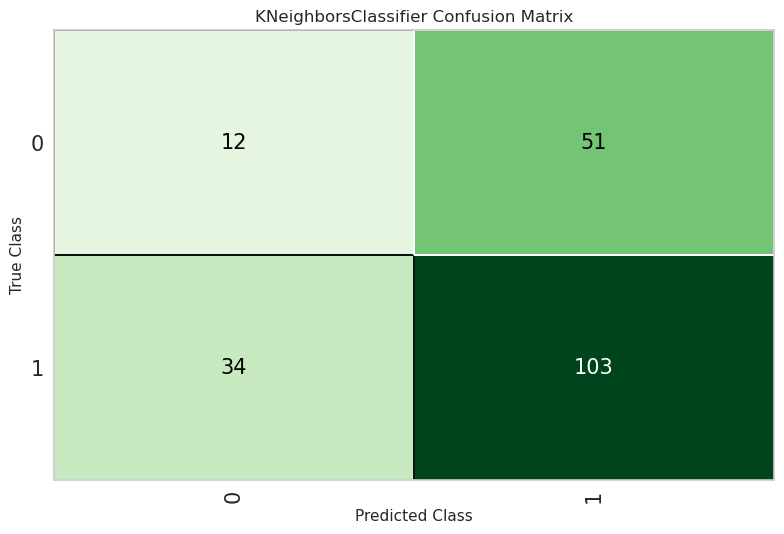

In [154]:
plot_model(knn, plot='confusion_matrix')

In [155]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [156]:
# importing data
dftest = pd.read_csv("/kaggle/input/loan-data-set/loan_test.csv")
dftest.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [157]:
# Replacing outliers
# Calculate IQR
Q1 = dftest['Loan_Amount'].quantile(0.25)
Q3 = dftest['Loan_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = dftest[(dftest['Loan_Amount'] < lower_bound) | (dftest['Loan_Amount'] > upper_bound)]

# Replace outliers with column mean
column_mean = dftest['Loan_Amount'].mean()
dftest.loc[outliers.index, 'Loan_Amount'] = column_mean

In [158]:
# Calculate IQR
Q1 = dftest['Applicant_Income'].quantile(0.25)
Q3 = dftest['Applicant_Income'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = dftest[(dftest['Applicant_Income'] < lower_bound) | (dftest['Applicant_Income'] > upper_bound)]

# Replace outliers with column mean
column_mean = dftest['Applicant_Income'].mean()
dftest.loc[outliers.index, 'Applicant_Income'] = column_mean

In [159]:
dftest.dropna(inplace=True,how='any')

In [160]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [161]:
# Using function to encoding of data 
label_encode_column(dftest,'Gender')
label_encode_column(dftest,'Married')
label_encode_column(dftest,'Self_Employed')
label_encode_column(dftest,'Education')
label_encode_column(dftest,'Area')

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,1,1,0,0,0,572000.000000,0,11000000.0,360.0,1.0,2
1,1,1,1,0,0,307600.000000,150000,12600000.0,360.0,1.0,2
2,1,1,2,0,0,500000.000000,180000,20800000.0,360.0,1.0,2
4,1,0,0,1,0,327600.000000,0,7800000.0,360.0,1.0,2
5,1,1,0,1,1,216500.000000,342200,15200000.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,0,0,226900.000000,216700,9900000.0,360.0,1.0,1
362,1,1,3+,1,1,400900.000000,177700,11300000.0,360.0,1.0,2
363,1,1,0,0,0,415800.000000,70900,11500000.0,360.0,1.0,2
365,1,1,0,0,0,500000.000000,239300,15800000.0,360.0,1.0,0


In [162]:
dftest['Dependents'] = dftest['Dependents'].str.replace('+', '')

In [163]:
# Chnging datatypes of columns
dftest[['Coapplicant_Income','Loan_Amount','Term','Credit_History','Dependents']] = dftest[['Coapplicant_Income','Loan_Amount','Term','Credit_History','Dependents']].astype(int)

In [164]:
pred_holdouts = predict_model(knn,data=dftest)
pred_holdouts.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,prediction_label,prediction_score
0,1,1,0,0,0,572000.0,0,11000000,360,1,2,1,0.6
1,1,1,1,0,0,307600.0,150000,12600000,360,1,2,1,0.6
2,1,1,2,0,0,500000.0,180000,20800000,360,1,2,1,0.6
4,1,0,0,1,0,327600.0,0,7800000,360,1,2,0,0.6
5,1,1,0,1,1,216500.0,342200,15200000,360,1,2,1,1.0


dsadgasgfagdsa